<a href="https://colab.research.google.com/github/camifer97/DataScience/blob/main/preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORTAMOS LAS LIBRERIAS NECESARIAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from google.colab import files

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


warnings.warn('ignore')

<ipython-input-1-16bcc2f5bfec>:18: UserWarning: ignore
  warnings.warn('ignore')


In [2]:
#SUBIMOS EL ARCHIVO
files.upload()

Saving credito.csv to credito.csv


{'credito.csv': b'ID,ingresos,edad,provincia_codigo,bancarizado,BCRA_Peor_Situacion,Cantidad_consultas_7_dias,Compromisos_Mensual,Endeudamiento_Externo,Nivel_Socioeconomico,Deuda_normal,Deuda_30,Deuda_90,deuda_120,deuda_180,canti_moras,autonomo,Es_jubilado,relacion_dependencia,dias_atraso,Cuota,cant_cuotas,Monto_Otorgado,PRODUCTO,PROVINCIA,moroso\n1,35000.00,35,X,1,1,1,9976.00,170000.00,4,170000.00,0.00,0.00,0.00,0.00,0,F,F,UNIVERSIDAD NACIONAL DE CORDOBA                             ,143,8957.00,12,50000.00,DS_SUCURSAL_ORO,CORDOBA,1\n2,50000.00,24,B,1,3,0,16807.00,236000.00,4,187000.00,0.00,11000.00,0.00,38000.00,0,F,F,POLICIA FEDERAL ARGENTINA                                   ,174,6874.49,9,25000.00,DS_BASICO,BUENOS AIRES,1\n3,50000.00,42,X,1,1,5,42959.00,683343.00,3,683343.00,0.00,0.00,0.00,0.00,0,F,F,MINISTERIO DE EDUCACION                                     ,0,4191.93,12,23400.00,DS_SUCURSAL_ORO,CORDOBA,0\n4,32000.00,21,H,1,1,3,7583.00,76000.00,5,76000.00,0.00,0.00,0.00,0.00,0,F,

In [3]:
#LEEMOS EL DATASET
credito = pd.read_csv('credito.csv')

In [4]:
#ANALISIS EXPLORATORIO DEL DATASET

print(f'Dimensionalidad filas x columnas:\n {credito.shape}')
print(f'Nombres de las columnas:\n {credito.columns}')
credito

Dimensionalidad filas x columnas:
 (1190, 26)
Nombres de las columnas:
 Index(['ID', 'ingresos', 'edad', 'provincia_codigo', 'bancarizado',
       'BCRA_Peor_Situacion', 'Cantidad_consultas_7_dias',
       'Compromisos_Mensual', 'Endeudamiento_Externo', 'Nivel_Socioeconomico',
       'Deuda_normal', 'Deuda_30', 'Deuda_90', 'deuda_120', 'deuda_180',
       'canti_moras', 'autonomo', 'Es_jubilado', 'relacion_dependencia',
       'dias_atraso', 'Cuota', 'cant_cuotas', 'Monto_Otorgado', 'PRODUCTO',
       'PROVINCIA', 'moroso'],
      dtype='object')


,ID,ingresos,edad,provincia_codigo,bancarizado,BCRA_Peor_Situacion,Cantidad_consultas_7_dias,Compromisos_Mensual,Endeudamiento_Externo,Nivel_Socioeconomico,...,autonomo,Es_jubilado,relacion_dependencia,dias_atraso,Cuota,cant_cuotas,Monto_Otorgado,PRODUCTO,PROVINCIA,moroso
0,1,35000.0,35,X,1,1,1.0,9976.0,170000.0,4,...,F,F,UNIVERSIDAD NACIONAL DE CORDOBA ...,143,8957.00,12,50000.0,DS_SUCURSAL_ORO,CORDOBA,1
1,2,50000.0,24,B,1,3,0.0,16807.0,236000.0,4,...,F,F,POLICIA FEDERAL ARGENTINA ...,174,6874.49,9,25000.0,DS_BASICO,BUENOS AIRES,1
2,3,50000.0,42,X,1,1,5.0,42959.0,683343.0,3,...,F,F,MINISTERIO DE EDUCACION ...,0,4191.93,12,23400.0,DS_SUCURSAL_ORO,CORDOBA,0
3,4,32000.0,21,H,1,1,3.0,7583.0,76000.0,5,...,F,F,CONTADURIA GENERAL DEL EJERCITO ...,23,3667.60,12,16000.0,DS_BASICO,CHACO,0
4,5,50000.0,21,Z,1,1,4.0,1040.0,23000.0,5,...,F,F,CONTADURIA GENERAL DEL EJERCITO ...,0,3891.04,6,15000.0,DS_SUCURSAL_ORO,SANTA CRUZ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,1186,50000.0,51,Q,0,0,0.0,0.0,0.0,-1,...,0,0,0,0,5557.65,12,32000.0,DS_REFINANCIACION,NEUQUEN,0
1186,1187,46240.0,32,C,1,1,0.0,3010.0,49000.0,3,...,F,F,POLICIA FEDERAL ARGENTINA ...,0,2594.03,6,10000.0,DS_SUCURSAL_ORO,CAPITAL FEDERAL,0
1187,1188,42866.0,21,B,1,1,18.0,3998.0,46000.0,3,...,F,F,SANOFI PASTEUR SA,58,8957.10,12,50000.0,DS_SUCURSAL_ORO,BUENOS AIRES,0
1188,1189,17000.0,38,B,0,0,0.0,0.0,0.0,-1,...,0,0,0,28,7633.03,6,30000.0,DS_REFINANCIACION,BUENOS AIRES,0


In [5]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1190 non-null   int64  
 1   ingresos                   1190 non-null   float64
 2   edad                       1190 non-null   int64  
 3   provincia_codigo           1190 non-null   object 
 4   bancarizado                1190 non-null   int64  
 5   BCRA_Peor_Situacion        1190 non-null   int64  
 6   Cantidad_consultas_7_dias  1189 non-null   float64
 7   Compromisos_Mensual        1190 non-null   float64
 8   Endeudamiento_Externo      1190 non-null   float64
 9   Nivel_Socioeconomico       1190 non-null   int64  
 10  Deuda_normal               1190 non-null   float64
 11  Deuda_30                   1190 non-null   float64
 12  Deuda_90                   1190 non-null   float64
 13  deuda_120                  1190 non-null   float

In [6]:
credito.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1190.0,595.500000,343.667717,1.0,298.2500,595.50,892.75,1190.00
ingresos,1190.0,53437.669538,43665.378404,12924.0,33539.6175,47000.00,63000.00,930000.00
edad,1190.0,43.843697,13.781331,18.0,33.0000,42.00,53.00,121.00
bancarizado,1190.0,0.642017,0.479609,0.0,0.0000,1.00,1.00,1.00
BCRA_Peor_Situacion,1190.0,0.889076,1.231544,-1.0,0.0000,1.00,1.00,5.00
Cantidad_consultas_7_dias,1189.0,1.879731,2.768540,0.0,0.0000,1.00,3.00,18.00
Compromisos_Mensual,1190.0,9321.036134,14235.963408,0.0,0.0000,3639.00,13106.00,177911.00
Endeudamiento_Externo,1190.0,152621.008403,240678.479013,0.0,0.0000,54011.50,227061.25,3206484.00
Nivel_Socioeconomico,1190.0,2.902521,2.750135,-1.0,-1.0000,4.00,5.00,7.00
Deuda_normal,1190.0,150607.071429,239969.973391,0.0,0.0000,53000.00,223000.00,3206484.00


In [7]:
# VERIFICAMOS SI HAY COLUMNAS QUE CONTENGAN VALORES VACIOS(NULL) O QUE NO SON NUMERICOS (NAN)
print(f"Columnas que contienen valores Null o NaN:\n {credito.isnull().any()}")

Columnas que contienen valores Null o NaN:
 ID                           False
ingresos                     False
edad                         False
provincia_codigo             False
bancarizado                  False
BCRA_Peor_Situacion          False
Cantidad_consultas_7_dias     True
Compromisos_Mensual          False
Endeudamiento_Externo        False
Nivel_Socioeconomico         False
Deuda_normal                 False
Deuda_30                     False
Deuda_90                     False
deuda_120                    False
deuda_180                    False
canti_moras                  False
autonomo                     False
Es_jubilado                  False
relacion_dependencia          True
dias_atraso                  False
Cuota                        False
cant_cuotas                  False
Monto_Otorgado               False
PRODUCTO                     False
PROVINCIA                    False
moroso                       False
dtype: bool


In [8]:
# BORRO LA COLUMNA ID QUE TRAIA EL DATASET PARA QUE SOLO QUEDE LA COLUMNA QUE GENERA PANDAS E INICIA EN CERO.
credito.drop("ID", axis=1, inplace=True)

In [9]:
# HAY DOS COLUMNAS QUE DESCRIBEN LO MISMO (PROVINCIA Y PROVINCIA_CODIGO), ELIMINAMOS LA MENOS DESCRIPTIVA
credito.drop("provincia_codigo", axis=1, inplace=True)

In [10]:
credito.head()

,ingresos,edad,bancarizado,BCRA_Peor_Situacion,Cantidad_consultas_7_dias,Compromisos_Mensual,Endeudamiento_Externo,Nivel_Socioeconomico,Deuda_normal,Deuda_30,...,autonomo,Es_jubilado,relacion_dependencia,dias_atraso,Cuota,cant_cuotas,Monto_Otorgado,PRODUCTO,PROVINCIA,moroso
0,35000.0,35,1,1,1.0,9976.0,170000.0,4,170000.0,0.0,...,F,F,UNIVERSIDAD NACIONAL DE CORDOBA ...,143,8957.00,12,50000.0,DS_SUCURSAL_ORO,CORDOBA,1
1,50000.0,24,1,3,0.0,16807.0,236000.0,4,187000.0,0.0,...,F,F,POLICIA FEDERAL ARGENTINA ...,174,6874.49,9,25000.0,DS_BASICO,BUENOS AIRES,1
2,50000.0,42,1,1,5.0,42959.0,683343.0,3,683343.0,0.0,...,F,F,MINISTERIO DE EDUCACION ...,0,4191.93,12,23400.0,DS_SUCURSAL_ORO,CORDOBA,0
3,32000.0,21,1,1,3.0,7583.0,76000.0,5,76000.0,0.0,...,F,F,CONTADURIA GENERAL DEL EJERCITO ...,23,3667.60,12,16000.0,DS_BASICO,CHACO,0
4,50000.0,21,1,1,4.0,1040.0,23000.0,5,23000.0,0.0,...,F,F,CONTADURIA GENERAL DEL EJERCITO ...,0,3891.04,6,15000.0,DS_SUCURSAL_ORO,SANTA CRUZ,0


In [11]:
# VEMOS QUE VALORES CONTIENE LA SERIE 'AUTONOMO' Y 'ES JUBILADO'
print(credito['autonomo'].unique())
print(credito['Es_jubilado'].unique())

# LOS VALORES APARECEN ORDENADOS DESDE LOS QUE MAS SE REPITEN A LOS QUE MENOS

['F' '0' 'V']
['F' 'V' '0']


In [12]:
# CAMBIAMOS LOS VALORES F(FALSO) Y V(VERDADERO) A 0 Y 1 RESPECTIVAMENTE.

credito['autonomo'] = credito.autonomo.map({'F': 0, 'V': 1})
credito['Es_jubilado'] = credito.Es_jubilado.map({'F': 0, 'V': 1})

credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ingresos                   1190 non-null   float64
 1   edad                       1190 non-null   int64  
 2   bancarizado                1190 non-null   int64  
 3   BCRA_Peor_Situacion        1190 non-null   int64  
 4   Cantidad_consultas_7_dias  1189 non-null   float64
 5   Compromisos_Mensual        1190 non-null   float64
 6   Endeudamiento_Externo      1190 non-null   float64
 7   Nivel_Socioeconomico       1190 non-null   int64  
 8   Deuda_normal               1190 non-null   float64
 9   Deuda_30                   1190 non-null   float64
 10  Deuda_90                   1190 non-null   float64
 11  deuda_120                  1190 non-null   float64
 12  deuda_180                  1190 non-null   float64
 13  canti_moras                1190 non-null   int64

In [13]:
# CON LOS CAMBIOS ANTERIORES, VEMOS QUE LOS DATOS QUE CORRESPONDIAN A '0'(STRING CERO) QUEDARON VACIOS. PARECE RAZONABLE REEMPLAZARLOS POR 0(INT CERO).
credito.fillna(0, inplace=True)

In [14]:
# REVISAMOS LOS TIPOS DE DATOS DE CADA SERIE
credito.dtypes

ingresos                     float64
edad                           int64
bancarizado                    int64
BCRA_Peor_Situacion            int64
Cantidad_consultas_7_dias    float64
Compromisos_Mensual          float64
Endeudamiento_Externo        float64
Nivel_Socioeconomico           int64
Deuda_normal                 float64
Deuda_30                     float64
Deuda_90                     float64
deuda_120                    float64
deuda_180                    float64
canti_moras                    int64
autonomo                     float64
Es_jubilado                  float64
relacion_dependencia          object
dias_atraso                    int64
Cuota                        float64
cant_cuotas                    int64
Monto_Otorgado               float64
PRODUCTO                      object
PROVINCIA                     object
moroso                         int64
dtype: object

In [15]:
# INDIVIDUALIZAMOS LAS CATEGORIAS CON TIPOS DE DATO OBJECT.
categ_columns = credito.dtypes == object
categ_columns = credito.columns[categ_columns].tolist()
print(categ_columns)

['relacion_dependencia', 'PRODUCTO', 'PROVINCIA']


In [16]:
# INDIVIDUALIZAMOS LAS CATEGORIAS CON TIPOS DE DATO INT Y FLOAT.
num_columns = credito.dtypes != object
num_columns = credito.columns[num_columns].tolist()
print(num_columns)

['ingresos', 'edad', 'bancarizado', 'BCRA_Peor_Situacion', 'Cantidad_consultas_7_dias', 'Compromisos_Mensual', 'Endeudamiento_Externo', 'Nivel_Socioeconomico', 'Deuda_normal', 'Deuda_30', 'Deuda_90', 'deuda_120', 'deuda_180', 'canti_moras', 'autonomo', 'Es_jubilado', 'dias_atraso', 'Cuota', 'cant_cuotas', 'Monto_Otorgado', 'moroso']


In [17]:
print(f"Tenemos {len(categ_columns)} features categoricas.")
print(f"Tenemos {len(num_columns)} features numericas.")

Tenemos 3 features categoricas.
Tenemos 21 features numericas.


In [18]:
#  nunique() se utiliza para contar el número de valores únicos en una Serie o columna de un DataFrame
print("Cantidad de valores unicos en cada feature:")
credito[categ_columns].apply(lambda x: x.nunique())

Cantidad de valores unicos en cada feature:


relacion_dependencia    199
PRODUCTO                  7
PROVINCIA                23
dtype: int64

In [19]:
# PARA LA SERIE "RELACION_DEPENDENCIA" NO ES RELEVANTE SABER DONDE TRABAJAN, SINO SIMPLEMENTE SI TRABAJA EN RELACION DE DEPENDENCIA O NO.
# POR LO QUE ESTABLECEREMOS EN 1 SI TRABAJA EN REL. DEPENDENCIA, Y 0 SI NO TRABAJA EN REL. DEPENDENCIA.
credito['relacion_dependencia'].mask(credito['relacion_dependencia'] != 0, 1, inplace = True)


In [20]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ingresos                   1190 non-null   float64
 1   edad                       1190 non-null   int64  
 2   bancarizado                1190 non-null   int64  
 3   BCRA_Peor_Situacion        1190 non-null   int64  
 4   Cantidad_consultas_7_dias  1190 non-null   float64
 5   Compromisos_Mensual        1190 non-null   float64
 6   Endeudamiento_Externo      1190 non-null   float64
 7   Nivel_Socioeconomico       1190 non-null   int64  
 8   Deuda_normal               1190 non-null   float64
 9   Deuda_30                   1190 non-null   float64
 10  Deuda_90                   1190 non-null   float64
 11  deuda_120                  1190 non-null   float64
 12  deuda_180                  1190 non-null   float64
 13  canti_moras                1190 non-null   int64

In [21]:
# LAS SIGUIENTES CATEGORIAS TIENEN COMO TIPO DE DATO OBJECT, PERO SUS DATOS SON ENTEROS. HAY QUE TRANSFORMARLOS.
columnas_int = ['relacion_dependencia', 'autonomo', 'Es_jubilado']
credito[columnas_int] = credito[columnas_int].astype(int)

In [22]:
# ANTES DE CODIFICAR LAS COLUMNAS PARA QUE LUEGO EL MODELO LAS PUEDA ENTENDER, PRIMERO DEBEMOS CAMBIAR EL TIPO DE DATO A STRING.
columnas_categ = ['PRODUCTO', 'PROVINCIA', 'Nivel_Socioeconomico', 'BCRA_Peor_Situacion']
credito[columnas_categ] = credito[columnas_categ].astype(str)

In [23]:
# APLICAMOS EL CODIGICADO
credito = pd.get_dummies(credito, dtype=int)
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ingresos                       1190 non-null   float64
 1   edad                           1190 non-null   int64  
 2   bancarizado                    1190 non-null   int64  
 3   Cantidad_consultas_7_dias      1190 non-null   float64
 4   Compromisos_Mensual            1190 non-null   float64
 5   Endeudamiento_Externo          1190 non-null   float64
 6   Deuda_normal                   1190 non-null   float64
 7   Deuda_30                       1190 non-null   float64
 8   Deuda_90                       1190 non-null   float64
 9   deuda_120                      1190 non-null   float64
 10  deuda_180                      1190 non-null   float64
 11  canti_moras                    1190 non-null   int64  
 12  autonomo                       1190 non-null   i

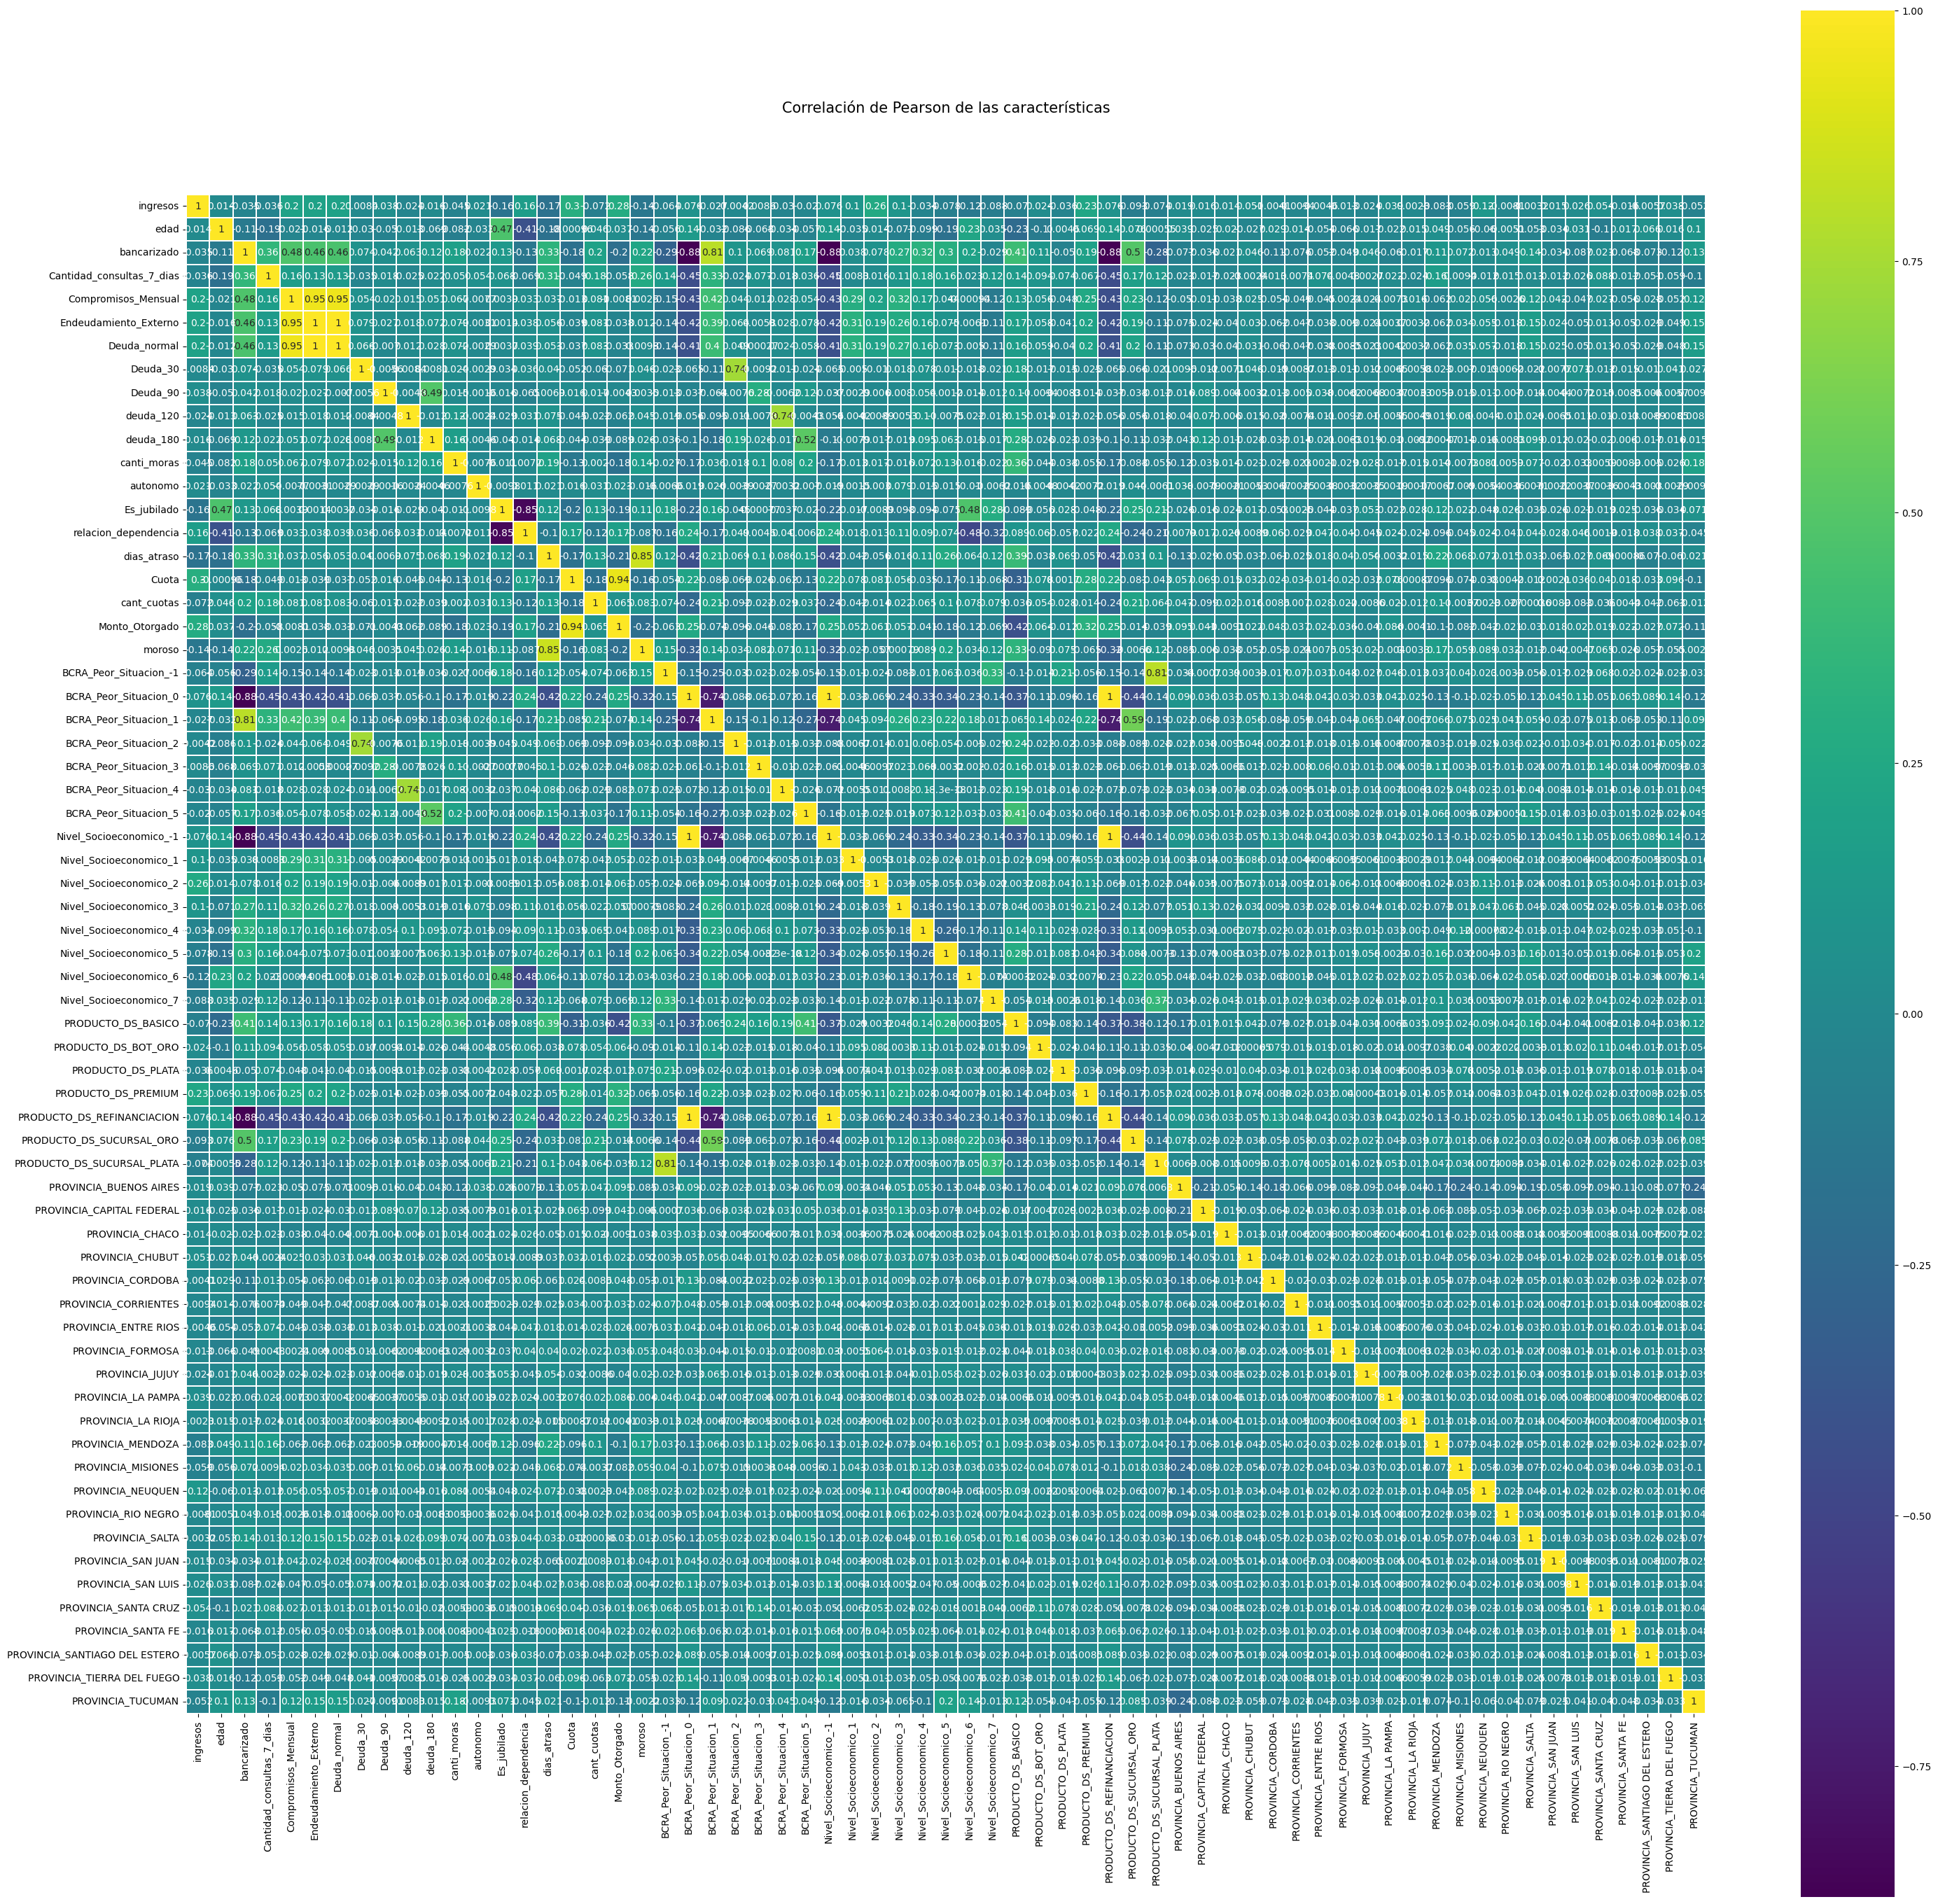

In [24]:
# VEMOS SI HAY CORRELACIONES
colormap = plt.cm.viridis # mapa de color
plt.figure(figsize = (35, 35))
plt.title('Correlación de Pearson de las características', y = 1.05, size = 15)
sns.heatmap(credito.corr(), linewidths = 0.1, vmax = 1.0, square = True,
            cmap = colormap,linecolor = 'white', annot = True)
plt.show()

moroso
0    921
1    269
dtype: int64


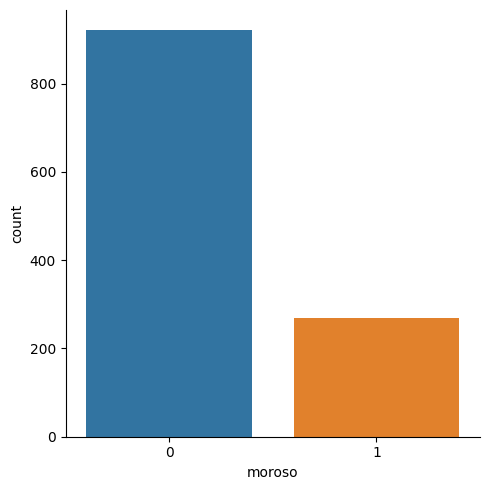

In [25]:
# VEMOS COMO ESTA DISTRIBUIDA LA CATEGORIA 'MOROSO'
print(credito.groupby('moroso').size())
sns.catplot(x = 'moroso', data = credito, kind = 'count')

In [26]:
# YA ESTA LISTO EL DATASET PARA ENTRENAR MODELOS
# FALTA ESTANDARIZAR LAS CARACTERISTICAS
# CREAMOS UNA COPIA DEL DATASET PARA CONTINUAR TRABAJANDO

cred = credito.copy()

In [27]:
y = np.array(cred['moroso']) # DEFINIMOS VARIABLE TARGET:es el resultado que el modelo de aprendizaje automático intenta estimar o predecir.
X = np.array(cred.drop(['moroso'], 1)) # ELIMINAMOS LA VARIABLE TARGET QUE POSTERIORMENTE VAMOS A INTENTAR PREDECIR.

<ipython-input-27-0bd0d1a20339>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(cred.drop(['moroso'], 1)) # ELIMINAMOS LA VARIABLE TARGET QUE POSTERIORMENTE VAMOS A INTENTAR PREDECIR.


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 6)

In [29]:
#Definimos el pipeline para la regresion logistica

logistic_regression_model = LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
                                               class_weight=None, random_state=None, solver='lbfgs', max_iter=100,
                                               multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)


In [31]:
#BUSCAR LOS MEJORES PARAMETROS CON GridSearchCV

pipe_log=make_pipeline(StandardScaler(),
                       LogisticRegression(random_state=16, l1_ratio=0.5, max_iter=500))

param_range = [0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{'logisticregression__C': param_range, 'logisticregression__penalty':['l1', 'l2', 'elasticnet'],
               'logisticregression__solver':['lbfgs', 'liblinear', 'newton-cg']
               }]

gs = GridSearchCV(estimator=pipe_log,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(f'Mejor accuracy: {gs.best_score_*100} %')
print(f'Mejores parámetros: {gs.best_params_}')

Mejor accuracy: 98.95065789473685 %
Mejores parámetros: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)

In [32]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)

print(f'Test accuracy: %.3f' % clf.score(X_test, y_test))



Test accuracy: 0.992


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


tn, fp, fn, tp = [184   0   2  52]


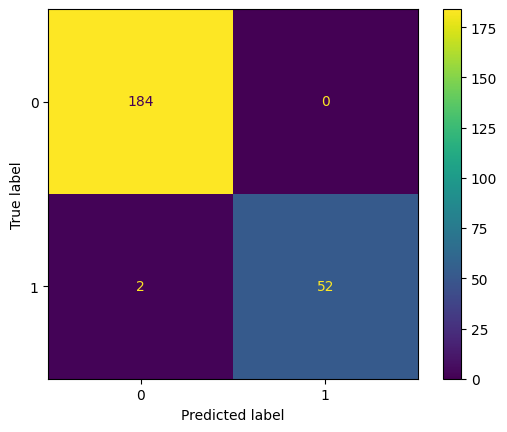

In [33]:
# VEMOS QUE OBTUVIMOS A TRAVES DE LA MATRIZ DE CONFUSION

y_pred_log = clf.predict(X_test)
print(f'tn, fp, fn, tp = {confusion_matrix(y_test, y_pred_log).ravel()}')

conf1 = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(conf1).plot()